In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

In [4]:
df = pd.read_csv("datasets/Stock_bond.csv")
df.head()

,Date,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,...,XOM_Volume,XOM_AC,S&P_AC,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield
0,2-Jan-87,922200,11.45,2540100,2.31,1130400,3.66,1218400,3.38,14454000,...,3611200,4.52,246.45,91880000,5.86,6.48,7.18,7.44,8.49,9.97
1,5-Jan-87,2100000,11.73,8670000,2.40,3032800,3.70,1752000,3.48,11538000,...,9040000,4.63,252.19,181900000,5.85,6.41,7.08,7.35,8.44,9.90
2,6-Jan-87,2720000,11.77,6992000,2.43,6614400,3.74,1206400,3.48,14279400,...,7931200,4.62,252.78,189300000,5.85,6.42,7.08,7.36,8.41,9.86
3,7-Jan-87,2000400,11.83,7621200,2.53,4233600,3.78,2188000,3.45,13003200,...,5351200,4.61,255.33,190900000,5.78,6.37,7.05,7.33,8.40,9.82
4,8-Jan-87,2460000,11.66,5807500,2.51,3816800,3.82,2195200,3.44,16320600,...,9680000,4.61,257.28,194500000,5.78,6.36,7.04,7.31,8.37,9.76


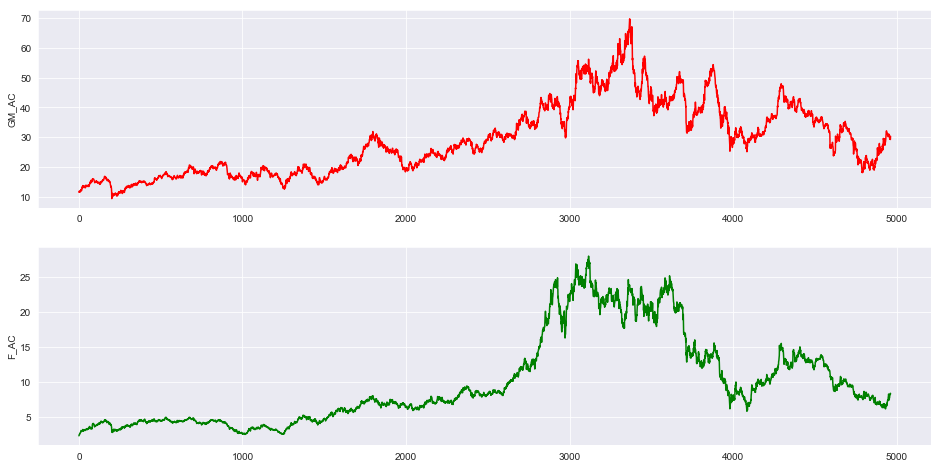

In [9]:
fig, ax = plt.subplots(2)
sns.lineplot(df.index,'GM_AC', data=df, ax=ax[0], color='red')
sns.lineplot(df.index,'F_AC', data=df, ax=ax[1], color='green')

In [5]:
data = [
    go.Scatter(
        x=df.Date,
        y=df['GM_AC'],
        mode='lines',
        marker = dict(
            color='red',
        ),
        name='GM_AC'
    ),
    go.Scatter(
        x=df.Date,
        y=df['F_AC'],
        mode='lines',
        marker=dict(
            color='green'
        ),
        name='F_AC'
    )
]
layout = go.Layout(
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Return'
    )
)
fig = go.Figure(data,layout)
iplot(fig, filename='index')

In [6]:
GMReturn = (df['GM_AC'][1:-1].values/df['GM_AC'][0:-2].values) - 1
FReturn = (df['F_AC'][1:-1].values/df['F_AC'][0:-2].values) - 1

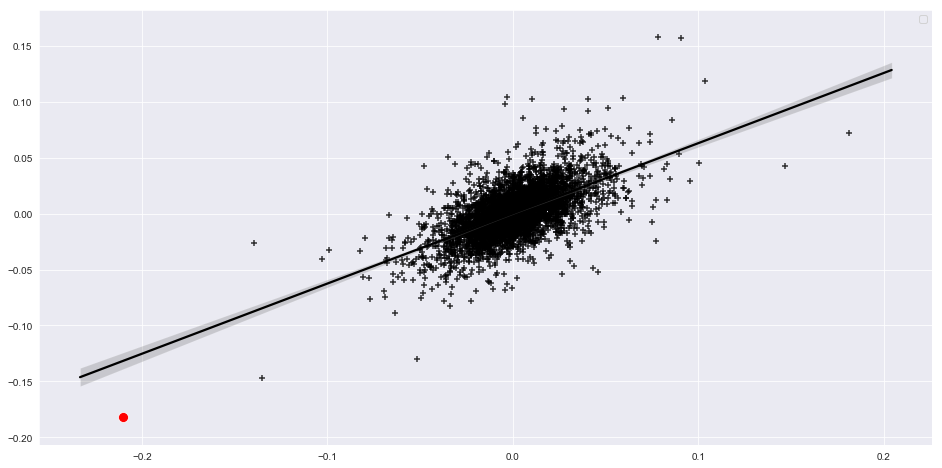

In [12]:
fig, ax = plt.subplots()
sns.regplot(GMReturn,FReturn, ax=ax, color='black', marker='+')
sns.scatterplot([min(GMReturn)], [min(FReturn)], ax=ax, color='red', s=100)
ax.legend("")

In [7]:
data = [
    go.Scatter(
        x=GMReturn,
        y=FReturn,
        mode='markers',
        marker=dict(
            color='black'
        )
    )
]
iplot(data,filename='correlation')

In [8]:
data = [
    go.Histogram2dContour(
        x=GMReturn,
        y=FReturn,
        colorscale='Blues',
        reversescale=True,
        xaxis='x',
        yaxis='y'
    ),
]
layout = go.Layout(
    autosize=True,
    xaxis = dict(
        zeroline = False,
        range=[-0.05,0.05],
        #domain = [0,0.85],
    ),
    yaxis = dict(
        zeroline = False,
        range=[-0.05,0.05],
        #domain = [0,0.85],
    ),
)
fig = go.Figure(data, layout)
iplot(fig,filename='histogram2D')

## Question 1: 
- Les deux variables sont corrélées
- les outliers de GMReturn sont ceux de FReturn

In [9]:
GMReturn_log = np.log(GMReturn)
FReturn_log = np.log(FReturn)

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log



/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log



Text(0, 0.5, 'FReturn_log')

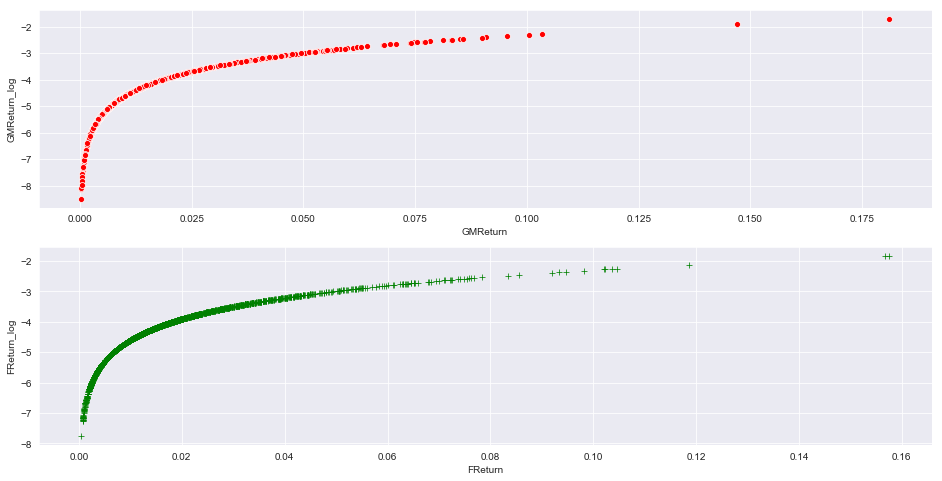

In [28]:
fig, ax = plt.subplots(2)
sns.scatterplot(GMReturn, GMReturn_log, ax=ax[0], color='red', marker="o")
ax[0].set_xlabel("GMReturn")
ax[0].set_ylabel("GMReturn_log")
sns.scatterplot(FReturn, FReturn_log, ax=ax[1], color='green', marker='+')
ax[1].set_xlabel("FReturn")
ax[1].set_ylabel("FReturn_log")

In [10]:
data = [
    go.Scatter(
        x = GMReturn,
        y = GMReturn_log,
        xaxis='x1',
        yaxis='y1',
        mode='markers',
        marker=dict(color='rgba(256,0,0,0.7)')
    ),
    go.Scatter(
        x = FReturn,
        y = FReturn_log,
        xaxis='x2',
        yaxis='y2',
        mode='markers',
        marker=dict(color='rgba(0,256,0,0.7)')
    )
]
layout = go.Layout(
    height=900,
    width=900,
    title='Log return',
    xaxis1=dict(range=[0,0.2],title='GMReturn'),
    yaxis1=dict(title="GMReturn_log"),
    xaxis2=dict(range=[0,0.2],title='FReturn'),
    yaxis2=dict(title="FReturn_log")
)
fig = tools.make_subplots(rows=2, cols=1)
fig.append_trace(data[0],1,1)
fig.append_trace(data[1],2,1)
fig['layout'].update(layout)
iplot(fig, filename='log-return')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



# Stimulation:
```text
- Hedge funds can earn high profits through the use of leverage, but leverage also creates high risk. The simulations in this section explore the effects of leverage in a simplified setting.
- Suppose a hedge fund owns $1,000,000 of stock and used $50,000 of its own capital and $950,000 in borrowed money for the purchase. Suppose that if the value of the stock falls below $950,000 at the end of any trading day, then the hedge fund will sell all the stock and repay the loan. This will wipe out its $50,000 investment. The hedge fund is said to be leveraged 20:1 since its position is 20 times the amount of its own capital invested.
- Suppose that the daily log returns on the stock have a mean of 0.05/year and a standard deviation of 0.23/year. These can be converted to rates per
- Problem 4: What is the probability that the value of the stock will be below $950,000 at the close of at least one of the next 45 trading days? 
```


In [16]:
import scipy.stats as st
n_inter = 100000
below = [False for i in range(n_inter)]
for i in range(n_inter):
    #253 date business
    r = st.norm.rvs(loc=(0.05/253), scale=0.23/np.sqrt(253), size=45)
    #r += 1
    logPrice = np.log(1000000) + np.cumsum(r)
    below[i] = (np.min(logPrice) < np.log(950000))
print(f"{np.mean(below)*100:.6f}%")

51.234000%


Problem 5:
- Suppose the hedge fund will sell the stock for a profit af at least $100,000 if the value of stock rises to at least $1,100,000 at the end of one of first 100 trading days, sell it for the loss if the value falls below $950,000 at the end of one of first 100 trading days or sell after 100 trading days of the closing price has stayed between $950,000 and $1,100,000.
- What is the probability the the hedge fund will make profit of at least $100,000.

In [18]:
n_iter = 100000
n_up = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    n_up[i] = np.mean(logPrice >= np.log(1100000))
print(f"{np.mean(n_up)*100:.6f}%")

17.950000%


Problem 6:
- What is probability the hegde fund will suffer a loss?

In [20]:
n_iter = 100000
n_down = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    n_down[i] = np.mean(logPrice < np.log(950000))
print(f"{np.mean(n_down)*100:.6f}%")

24.559270%


Problem 7:
- What is the expected profit  from this trading strategy?

In [33]:
n_iter = 100000
log950 = np.log(950000)
log1100 = np.log(1100000)
n_bet = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=100)
    logPrice = np.log(1000000) + np.cumsum(r)
    a = [1 if ((i > log950) and (i < log1100)) else 0 for i in logPrice]
    n_bet[i] = np.mean(a)
print(f"{np.mean(n_bet)*100:.6f}%")

57.453430%


Problem 8:
- What is expected return? only 50000 dola invested, How long the hedge fund holds its position before selling?

In [42]:
# suppose the units return is dayly
# interest return dayly wil be like above
# find the number of day the hegde fund will hold this stock as long as
# stocks price between 950000 and 1100000
n_iter = 100000
log950 = np.log(950000)
log1100 = np.log(1100000)
n_day = [False for i in range(n_iter)]
for i in range(n_iter):
    r = st.norm.rvs(loc=(0.05/253), scale=(0.23/np.sqrt(253)), size=253)
    logPrice = np.log(1000000) + np.cumsum(r)
    #a = [1 if ((i > log950) and (i < log1100)) else 0 for i in logPrice]
    #n_bet[i] = np.mean(a)
    day = []
    for (ix,p) in enumerate(logPrice):
        if (p > log1100):
            day.append(ix+1)
    n_day[i] = day[0]
print(f"{np.mean(n_day):.6f}")

IndexError: list index out of range

In [109]:
fig = tools.make_subplots(rows=3, cols=3)
data = []
for i in range(9):
    logr = st.norm.rvs(loc=0.05/253,scale=0.23/np.sqrt(253), size=253)
    price = 120*np.exp(np.cumsum(logr))
    print(list(range(len(price))))
    data.append(go.Scatter(
        x = list(range(len(price))),
        y = list(price)
        )
    )
for i in range(9):
    fig.append_trace(data[i],row=i%3+1,col=i//3+1)
#fig['layout'].update(height=600, width=800, title='i <3 annotations and subplots')
iplot(fig, filename='geometric random walk')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 

In [79]:
data = [
    go.Scatter(
        x = list(range(len(price))),
        y = price,
        mode='markers',
        marker=dict(color='rgba(256,0,0,0.7)')
    )
    ]
fig = tools.make_subplots(rows=1, cols=1)
fig.append_trace(data,0,0)
iplot(fig,filename="hello")

This is the format of your plot grid:
[ (1,1) x1,y1 ]



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [[Scatter({
    'marker': {'color': 'rgba(256,0,0,0.7)'},
    'mode': 'markers',
    'x': [0, 1, 2, ..., 250, 251, 252],
    'y': array([122.81722035, 121.96627526, 123.29679004, ..., 191.36865878,
                191.82738892, 188.99744604])
})]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'heatmap',
                     'heatmapgl', 'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcats', 'parcoords', 'pie', 'pointcloud',
                     'sankey', 'scatter', 'scatter3d',
                     'scattercarpet', 'scattergeo', 'scattergl',
                     'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [46]:
tools.make_subplots?

In [44]:
plt.subplot?

In [91]:
for i in range(9):
    print(i%3+1,"--",i//3+1)

1 -- 1
2 -- 1
3 -- 1
1 -- 2
2 -- 2
3 -- 2
1 -- 3
2 -- 3
3 -- 3
